In [ ]:
# https://medium.com/@med.hmamouch99/exploring-causal-inference-with-dowhy-24176444c457
# https://www.kaggle.com/datasets/mohithsairamreddy/salary-data?resource=download
# https://medium.com/towards-data-science/causal-effects-via-regression-28cb58a2fffc
# https://arshren.medium.com/exploring-causality-with-dowhy-8257732998e4

In [2]:
import pandas as pd
import numpy as np
from dowhy import CausalModel

df = pd.read_csv('Salary_Data.csv')
df = df.rename(columns=lambda x:x.replace(' ', '_'))#, inplace=True)

numeric = ['Age', 'Years_of_Experience', 'Salary']
for col in numeric:
    df[col] = df[col].fillna(df[col].mean())

categorical = ['Gender', 'Education_Level']
for col in categorical:
    mode_val = df[col].mode()[0] 
    df[col]=df[col].fillna(mode_val)

df['Education_Level'] = np.where(df['Education_Level'] == "PhD", 1, 0)

df=df[['Age','Gender','Education_Level','Years_of_Experience','Salary']].copy()
df.head()

,Age,Gender,Education_Level,Years_of_Experience,Salary
0,32.0,Male,0,5.0,90000.0
1,28.0,Female,0,3.0,65000.0
2,45.0,Male,1,15.0,150000.0
3,36.0,Female,0,7.0,60000.0
4,52.0,Male,0,20.0,200000.0


In [3]:
causal_graph = """
digraph {
Age;
Gender;
Education_Level;
Years_of_Experience;
Salary;
Gender -> Education_Level -> Salary;
Gender -> Salary;
Age -> Years_of_Experience -> Salary;
Age -> Education_Level;
Age -> Salary;
Gender->Salary;}"""

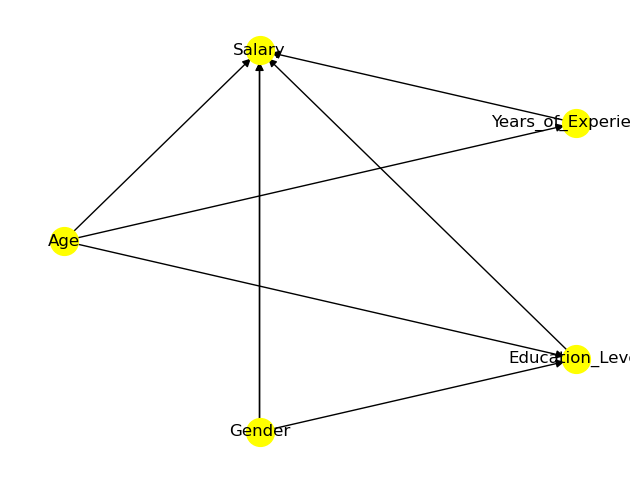

In [4]:
model= CausalModel(
        data = df,
        graph=causal_graph.replace("\n", " "),
        treatment='Education_Level',
        outcome='Salary')

model.view_model()

In [5]:
estimands = model.identify_effect()
print(estimands)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                               
──────────────────(E[Salary|Age,Gender])
d[Education_Level]                      
Estimand assumption 1, Unconfoundedness: If U→{Education_Level} and U→Salary then P(Salary|Education_Level,Age,Gender,U) = P(Salary|Education_Level,Age,Gender)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [6]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

DML_estimate = model.estimate_effect(estimands, 
                                     method_name="backdoor.econml.dml.DML",
                                     method_params={"init_params":{
                                         'model_y':LinearRegression(),
                                         'model_t':LinearRegression(),
                                         'model_final':LinearRegression()
                                                                  },
                                                   "fit_params":{}
                                              })
print(DML_estimate)

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                               
──────────────────(E[Salary|Age,Gender])
d[Education_Level]                      
Estimand assumption 1, Unconfoundedness: If U→{Education_Level} and U→Salary then P(Salary|Education_Level,Age,Gender,U) = P(Salary|Education_Level,Age,Gender)

## Realized estimand
b: Salary~Education_Level+Age+Gender | Years_of_Experience
Target units: ate

## Estimate
Mean value: 8456.628664239548
Effect estimates: [ 2147.47920198 -1929.92748123 22534.51261806 ...   108.77586037
 20495.80927645 -6007.33416445]



The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.


In [7]:
refute_results = model.refute_estimate(estimands, DML_estimate,
                                       method_name="random_common_cause")
print(refute_results)

The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted,

Refute: Add a random common cause
Estimated effect:8456.628664239548
New effect:8449.740510240315
p value:0.48



The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted, but consider fitting a model without an intercept if possible.
The final model has a nonzero intercept for at least one outcome; it will be subtracted,

In [8]:
Xlearner_estimate = model.estimate_effect(estimands,
                          method_name="backdoor.econml.metalearners.XLearner",
                          method_params={"init_params":{
                                              'models': DecisionTreeRegressor()
                                                    },
                                          "fit_params":{}
                                         })

print(Xlearner_estimate)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
        d                               
──────────────────(E[Salary|Age,Gender])
d[Education_Level]                      
Estimand assumption 1, Unconfoundedness: If U→{Education_Level} and U→Salary then P(Salary|Education_Level,Age,Gender,U) = P(Salary|Education_Level,Age,Gender)

## Realized estimand
b: Salary~Education_Level+Years_of_Experience+Age+Gender
Target units: ate

## Estimate
Mean value: 12488.095082717053
Effect estimates: [-36732.33673962  57779.75917563  17500.         ...  73298.18017691
  40000.          58718.61309206]



In [9]:
refute_results = model.refute_estimate(estimands, Xlearner_estimate,
                                       method_name="random_common_cause")
print(refute_results)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please cha

Refute: Add a random common cause
Estimated effect:12488.095082717053
New effect:12383.45632386172
p value:0.5



A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


### Linear Regression doesn't work. It worked, probably in an older version of the package

In [10]:
from copy import deepcopy as copy
estimate= model.estimate_effect(
 identified_estimand=copy(estimands),
 method_name='backdoor.linear_regression',
 confidence_intervals=True,
  test_significance=True
)

print(f'Estimate of causal effect: {estimate}')

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': True, 'target_units': 'ate', 'effect_modifiers': ['Years_of_Experience']}


ValueError: shapes (921,5) and (6,) not aligned: 5 (dim 1) != 6 (dim 0)

In [11]:
df

,Age,Gender,Education_Level,Years_of_Experience,Salary,__categorical__Years_of_Experience
0,32.0,Male,0,5.0,90000.0,"(3.0, 5.0]"
1,28.0,Female,0,3.0,65000.0,"(-0.001, 3.0]"
2,45.0,Male,1,15.0,150000.0,"(13.0, 34.0]"
3,36.0,Female,0,7.0,60000.0,"(5.0, 8.0]"
4,52.0,Male,0,20.0,200000.0,"(13.0, 34.0]"
...,...,...,...,...,...,...
6699,49.0,Female,1,20.0,200000.0,"(13.0, 34.0]"
6700,32.0,Male,0,3.0,50000.0,"(-0.001, 3.0]"
6701,30.0,Female,0,4.0,55000.0,"(3.0, 5.0]"
6702,46.0,Male,0,14.0,140000.0,"(13.0, 34.0]"


In [12]:
groupy_mean = df.groupby(by=['Education_Level','__categorical__Years_of_Experience'])['Salary'].mean()
groupy_mean = groupy_mean.reset_index()
groupy_mean

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.


,Education_Level,__categorical__Years_of_Experience,Salary
0,0,"(-0.001, 3.0]",57482.147391
1,0,"(3.0, 5.0]",92350.274487
2,0,"(5.0, 8.0]",116280.304564
3,0,"(8.0, 13.0]",142443.009179
4,0,"(13.0, 34.0]",172622.305455
5,1,"(-0.001, 3.0]",87230.961538
6,1,"(3.0, 5.0]",82724.093023
7,1,"(5.0, 8.0]",148526.536232
8,1,"(8.0, 13.0]",154096.016317
9,1,"(13.0, 34.0]",183371.382514


In [13]:
groupy_mean_1= groupy_mean[groupy_mean['Education_Level'] == 1]
groupy_mean_0= groupy_mean[groupy_mean['Education_Level'] == 0]

merged = pd.merge(groupy_mean_1, groupy_mean_0, on='__categorical__Years_of_Experience', how='inner')
merged

,Education_Level_x,__categorical__Years_of_Experience,Salary_x,Education_Level_y,Salary_y
0,1,"(-0.001, 3.0]",87230.961538,0,57482.147391
1,1,"(3.0, 5.0]",82724.093023,0,92350.274487
2,1,"(5.0, 8.0]",148526.536232,0,116280.304564
3,1,"(8.0, 13.0]",154096.016317,0,142443.009179
4,1,"(13.0, 34.0]",183371.382514,0,172622.305455


In [14]:
merged['diff'] = merged['Salary_x'] - merged['Salary_y']
abs(merged['diff']).mean()